## Classificador de Sorrisos utilizando KNN (K- Nearest Neighbors)

É amplamente utilizado em problemas de classificação de dados. A proposta é armazenar todos os casos disponíveis e classificar novos casos por maioria de votos de seus vizinhos k.
O caso que está sendo atribuído à classe é mais comum entre os seus K vizinhos mais próximos medidos por uma função de distância.
Neste caso estamos utilizando a distância euclidiana.

In [104]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

def print_faces(images, target, top_n):

    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):

        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        #p.imshow(images[i], cmap=plt.cm.bone,cmap='gray')
        p.imshow(images[i],cmap='gray')
        if
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))



Populating the interactive namespace from numpy and matplotlib


In [105]:
 # the index ranges of images of smile people
smiles = [
 (20, 22), (26, 27), (40, 49), (51, 53), (69, 70),
 (72, 75), (90, 93), (100, 103), (130, 139), (160, 161),
 (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
 (186, 188), (190, 191), (200, 202), (214, 217), (234, 235),
 (267, 268), (305, 308), (310, 312),(322,327),(340,344),(348,350),
 (367,368),(380,389),(391,399)
]

In [106]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
from sklearn import metrics
    
def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print scores
    print ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)

    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)

    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(y_test, y_pred)

[ 0.9         0.68333333  0.86666667  0.81666667  0.83333333]
Mean score: 0.820 (+/-0.037)
Accuracy on training set:
1.0
Accuracy on testing set:
0.87
Classification Report:
             precision    recall  f1-score   support

        0.0       0.97      0.86      0.91        76
        1.0       0.67      0.92      0.77        24

avg / total       0.90      0.87      0.88       100

Confusion Matrix:
[[65 11]
 [ 2 22]]


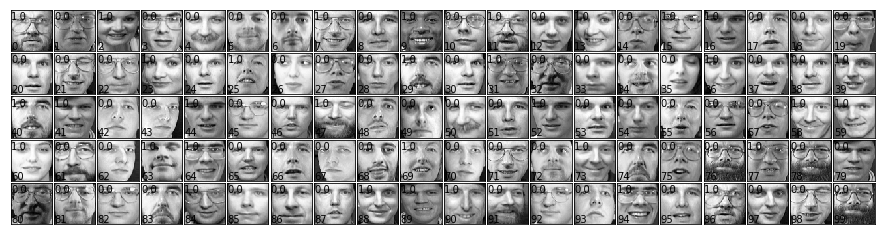

In [107]:
from sklearn.svm import SVC
import sklearn as sk
from scipy.spatial import distance
from sklearn import tree
from sklearn import datasets
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cross_validation import train_test_split
import numpy as np

faces = fetch_olivetti_faces()

def create_target(segments):
 # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y
target_smiles = create_target(smiles)

#Treino
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_smiles, test_size=0.25, random_state=0)
svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

y_pred = svc_2.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 100)